# QUANTUM PHASE ESTIMATION

In quantum computing, the quantum phase estimation algorithm is a quantum algorithm to estimate the phase corresponding to an eigenvalue of a given unitary operator. Because the eigenvalues of a unitary operator always have unit modulus, they are characterized by their phase, and therefore the algorithm can be equivalently described as retrieving either the phase or the eigenvalue itself.

Phase estimation is frequently used as a subroutine in other quantum algorithms, such as Shor's algorithm

<h3>Set up the Environment</h3>

In [139]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit import QuantumCircuit, Aer, execute,transpile
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from qiskit.circuit import Gate
import matplotlib.pyplot as plt
import math
from numpy import pi
from qiskit.circuit.library import QFT

<h3>Intial states</h3>

In [140]:
qubits=4 # this number can be changed 
qc = QuantumCircuit(qubits,qubits-1)
qc.x(qubits-1)
qc.draw(output='mpl')
qc.barrier()

<h3>Apply Handamard Gate</h3>

In [141]:
for qubit in range(qubits-1):
    qc.h(qubit)

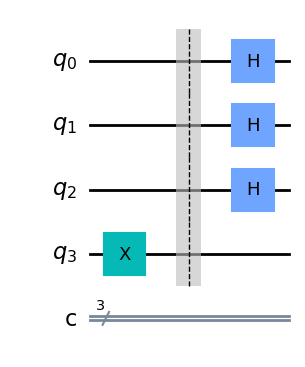

In [142]:
# Draw the circuit
qc.draw(output='mpl')

<h3>Apply Controlled-U operations</h3>

In [143]:
repetitions = 1
for qubit in range(qubits-1):
    for n in range(repetitions):
        qc.cp(math.pi/4,qubit,qubits-1);
    repetitions *= 2

In [144]:
# Draw the circuit
qc.draw(output='mpl')
qc.barrier()

<h3>Inverse QFT</h3>

In [145]:
#Apply the inverse QFT to the ancilla qubits
qc = qc.compose(QFT(qubits-1, inverse=True)) #I tookk it as ready componment
# Measure
qc.barrier()
for qubit in range(qubits-1):
    qc.measure(qubit,qubit)

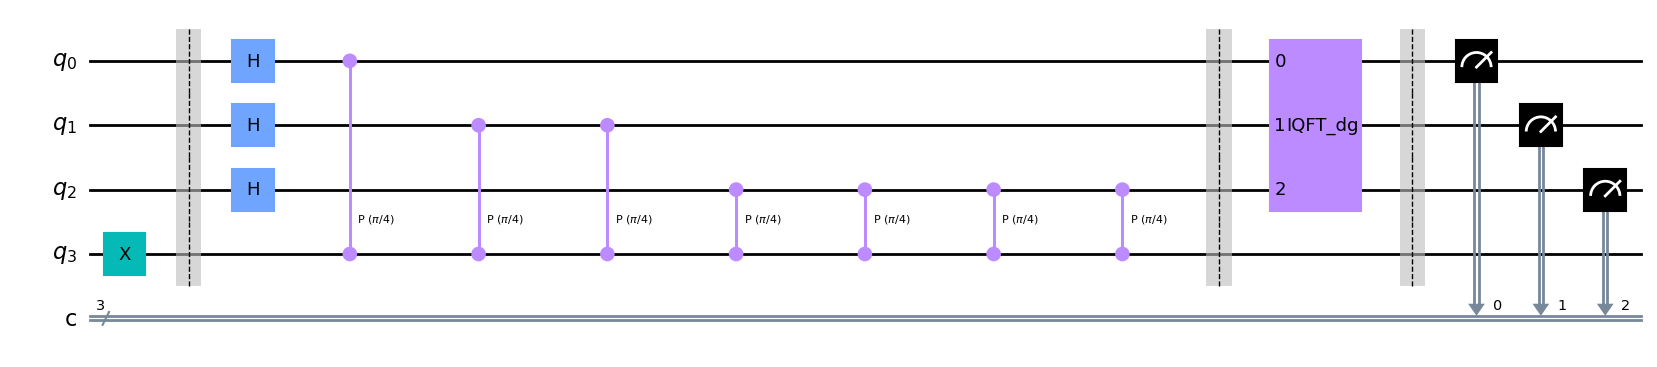

In [146]:
# Draw the circuit
qc.draw(output='mpl')

<h3>Results</h3>

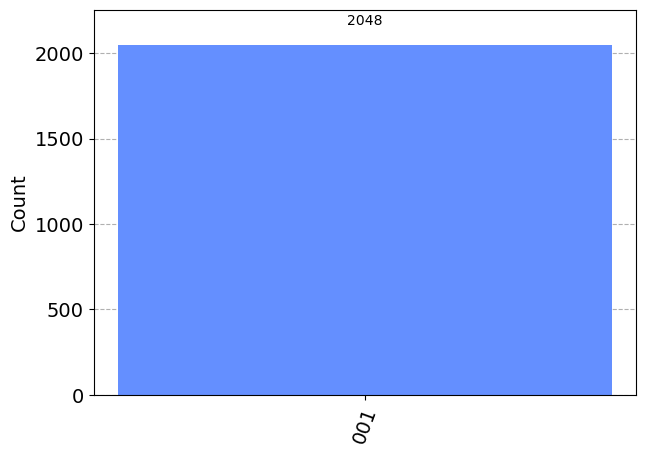

In [147]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 2048
t_qpe = transpile(qc, aer_sim)
results = aer_sim.run(t_qpe, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [159]:
# Function to convert bit string to decimal
def bitstring_to_decimal(bitstring):
    decimal = 0
    for idx, bit in enumerate(reversed(bitstring)):
        decimal += int(bit) * (2 ** idx)
    return decimal

# Analyze the results

phase_estimation_decimal = bitstring_to_decimal(answer) / (2 ** (qubits-1))

print(f"Most frequent bitstring: {most_frequent_bitstring}")
print(f"Estimated phase (decimal): {phase_estimation_decimal}")
print(f"Estimated phase (radians): {phase_estimation_decimal * 2 * pi}")

Most frequent bitstring: 001
Estimated phase (decimal): 0.125
Estimated phase (radians): 0.7853981633974483


In [157]:
1/8

0.125

In [158]:
phase_estimation_decimal

0.0625